#### Copyright (C) Kevin Costa Scaccia - All Rights Reserved
##### Written by Kevin Scaccia <kevin_developer@outlook.com>, March 2019

## Simple Perceptron Implementation 

## Imports

In [0]:
import numpy as np # matrix operations
import matplotlib.pyplot as plt  # plot results
import sys  
import pandas as pd # load datasets
from sklearn import datasets # test in a real dataset
plt.style.use('ggplot')  # plot style color

## Perceptron Class

In [0]:
class Perceptron():
    #
    # Constructor
    #
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.n_features = data.shape[1]
        self.W = np.zeros(self.n_features + 1)  # add bias
    #
    # Train the Model
    #    
    def train(self, epochs=100, lr=0.01):
        all_erro = []
        for epoch in range(epochs):
            epoch_erro = 0
            for example, target in zip(self.data, self.target):
                X = np.concatenate([[1], example])
                Y = target
                y = np.dot(self.W, X) # sum
                # activation
                if y > 0:
                    y = 1
                else:
                    y = 0    
                erro = (Y - y)  # bias
                epoch_erro += erro**2
                # train
                self.W += lr * erro * X
            all_erro.append(epoch_erro)
        # plot train curve
        plt.figure(figsize=(8,4)); plt.ylabel("MSE"); plt.xlabel("Epochs");
        plt.title("Train Performance over the Epochs")        
        plt.plot(range(epochs), all_erro, 'ro', linestyle=':')      
    #
    # Predict 
    #
    def predict(self, x):
        X = np.concatenate([[1], x]) # bias
        y = np.dot(self.W, X)
        # activation
        if y > 0:
            return 1
        else:
            return 0    
    #
    # Measure Model Accuracy in the Test Set
    #
    def accuracy(self, test_x, test_y):
        correct = 0
        for i in range(len(test_x)):
            y = self.predict(test_x[i])
            Y = test_y[i]
            if y == Y: 
                correct += 1
        acc = (correct/len(test_x))*100
        print("Model Test-set Accuracy: {:.4}%".format(acc))
        return acc

## Test in Breast Cancer Dataset

Model Test-set Accuracy: 64.18%


64.17582417582418

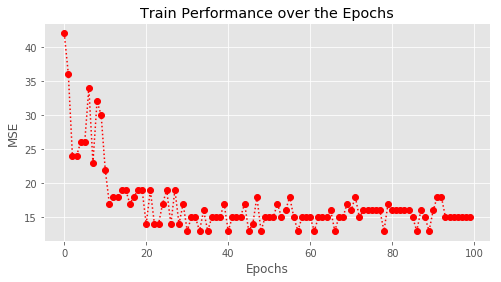

In [0]:
dataset = datasets.load_breast_cancer()
data = dataset['data']
targets = dataset['target']
#
#
percent_train = 0.8
train_split = int(percent_train*len(data))
#
#
train_data = data[train_split:]
test_data = data[:train_split]
train_target = targets[train_split:]
test_target = targets[:train_split]
#
#
model = Perceptron(train_data, train_target)
model.train(epochs=100, lr=0.01)
model.accuracy(test_data, test_target)

## Test in the or truth table (csv)

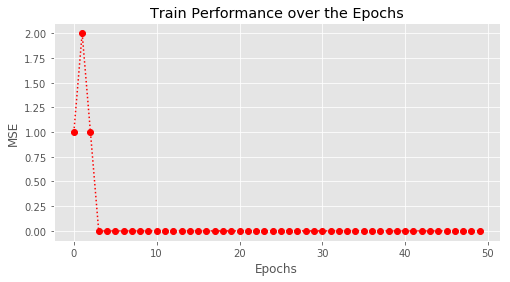

In [0]:
data = pd.read_csv('data_or.csv', delimiter=',')
data_x = data.values[:,:-1] # first columns
data_y = data.values[:,-1] # last column (target)
#
model = Perceptron(data_x, data_y)
model.train(epochs=50,)

In [0]:
# Example data 
''' xor.csv:
0,0,0
0,1,1
1,0,1
1,1,0
'''
''' or.csv:
0,0,0
0,1,1
1,0,1
1,1,1
'''

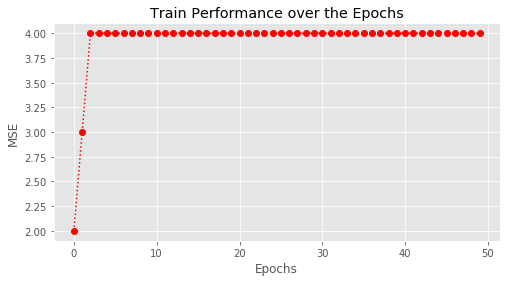

In [0]:
data = pd.read_csv('data_xor.csv', delimiter=',')
data_x = data.values[:,:-1] # first columns
data_y = data.values[:,-1] # last column (target)
#
model = Perceptron(data_x, data_y)
model.train(epochs=50,)